# Hi AI_Academy 

# This is project 6 :Sales Analysis
# so let's dive into the work

## 1-Firstly we have to import the libraries

In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mpl_dates
pd.set_option('display.max_columns', 20)

## 2-Secondly is to read and understand the data

In [2]:
df=pd.read_csv('c:/Users/ASUS/Downloads/sales_data.csv')    # here we read and display the data
df

,Order Date,Order ID,Product,Product_ean,Category,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,1/22/2019 21:25,141234,iPhone,5.640000e+12,Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,1/28/2019 14:15,141235,Lightning Charging Cable,5.560000e+12,Accessories,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,1/17/2019 13:33,141236,Wired Headphones,2.110000e+12,Accessories,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,1/5/2019 20:33,141237,27in FHD Monitor,3.070000e+12,NaN,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,1/25/2019 11:59,141238,Wired Headphones,9.690000e+12,Accessories,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
...,...,...,...,...,...,...,...,...,...,...,...
185961,12/11/2019 20:58,319666,Lightning Charging Cable,6.550000e+12,Accessories,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750
185962,12/1/2019 12:01,319667,AA Batteries (4-pack),5.350000e+12,Accessories,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400
185963,12/9/2019 6:43,319668,Vareebadd Phone,2.670000e+12,Accessories,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000
185964,12/3/2019 10:39,319669,Wired Headphones,5.220000e+12,Accessories,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950


### lets understand the data

In [3]:
df.shape     # so this data has nearly 186 thousand row and 11 column

(185966, 11)

In [4]:
df.dtypes   # by this command we know the type of every column

Order Date           object
Order ID              int64
Product              object
Product_ean         float64
Category             object
Purchase Address     object
Quantity Ordered      int64
Price Each          float64
Cost price          float64
turnover            float64
margin              float64
dtype: object

In [5]:
df.describe().T   # this is some stastical informations 

,count,mean,std,min,25%,50%,75%,max
Order ID,185966.0,2.304149e+05,5.151352e+04,1.412340e+05,1.858282e+05,2.303685e+05,2.750320e+05,3.196700e+05
Product_ean,185966.0,5.509176e+12,2.598419e+12,1.000000e+12,3.250000e+12,5.510000e+12,7.770000e+12,1.000000e+13
Quantity Ordered,185966.0,1.124388e+00,4.428009e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00
Price Each,185734.0,1.840409e+02,3.327125e+02,2.990000e+00,1.195000e+01,1.495000e+01,1.500000e+02,1.700000e+03
Cost price,185966.0,6.967056e+01,1.094270e+02,1.495000e+00,5.975000e+00,7.475000e+00,9.750000e+01,5.610000e+02
turnover,185966.0,1.854960e+02,3.329287e+02,2.990000e+00,1.195000e+01,1.495000e+01,1.500000e+02,3.400000e+03
margin,185966.0,1.152926e+02,2.252333e+02,1.495000e+00,5.975000e+00,7.475000e+00,5.250000e+01,2.278000e+03


### so now we understood the data but want to do some preprations 

## 3-Data Preperation

### lets make the data more readable 

In [6]:
city_list=[]                                # in this cell i split the city from the address
for Purchase in df['Purchase Address']:
    city=Purchase.split(',')
    city_list.append(city[1])
city_list
df['City']=city_list

In [7]:
timing=[]                                   # in this cell i split the time from the order date
for tim in df['Order Date']:
    time=tim.split()
    timing.append(time[1])
timing
df['Timing']=timing

In [8]:
date=[]                                     # in this cell i split the date from the order date
for tim in df['Order Date']:
    time=tim.split()
    date.append(time[0])
df['order date']=date

### lets delete the columns we don't need it

In [9]:
df.drop(columns='Product_ean',inplace=True) 
df.drop(columns='Order Date',inplace=True)
df

,Order ID,Product,Category,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,City,Timing,order date
0,141234,iPhone,Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,Boston,21:25,1/22/2019
1,141235,Lightning Charging Cable,Accessories,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,Portland,14:15,1/28/2019
2,141236,Wired Headphones,Accessories,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,San Francisco,13:33,1/17/2019
3,141237,27in FHD Monitor,NaN,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,Los Angeles,20:33,1/5/2019
4,141238,Wired Headphones,Accessories,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,Austin,11:59,1/25/2019
...,...,...,...,...,...,...,...,...,...,...,...,...
185961,319666,Lightning Charging Cable,Accessories,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750,San Francisco,20:58,12/11/2019
185962,319667,AA Batteries (4-pack),Accessories,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400,Los Angeles,12:01,12/1/2019
185963,319668,Vareebadd Phone,Accessories,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000,Seattle,6:43,12/9/2019
185964,319669,Wired Headphones,Accessories,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950,Dallas,10:39,12/3/2019


### now we need to correct the  names of columns and arrange them

In [10]:
df.rename(columns = {'order date':'Order_Date','Order ID':'Order_ID','Purchase Address'
                     :'Purchase_Address','Quantity Ordered':'Quantity_Ordered'
                     ,'Price Each':'Price_Each','Cost price':'Cost_price'}, inplace = True)   # here we correct the names 
df=df.iloc[:, [0,11,10,1,2,3,9,4,5,6,8,7]]         # and here we arranged the columns

### i think now the data is more readable 

In [11]:
df

,Order_ID,Order_Date,Timing,Product,Category,Purchase_Address,City,Quantity_Ordered,Price_Each,Cost_price,margin,turnover
0,141234,1/22/2019,21:25,iPhone,Phones,"944 Walnut St, Boston, MA 02215",Boston,1,700.00,231.0000,469.0000,700.00
1,141235,1/28/2019,14:15,Lightning Charging Cable,Accessories,"185 Maple St, Portland, OR 97035",Portland,1,14.95,7.4750,7.4750,14.95
2,141236,1/17/2019,13:33,Wired Headphones,Accessories,"538 Adams St, San Francisco, CA 94016",San Francisco,2,11.99,5.9950,11.9900,23.98
3,141237,1/5/2019,20:33,27in FHD Monitor,NaN,"738 10th St, Los Angeles, CA 90001",Los Angeles,1,149.99,97.4935,52.4965,149.99
4,141238,1/25/2019,11:59,Wired Headphones,Accessories,"387 10th St, Austin, TX 73301",Austin,1,11.99,5.9950,5.9950,11.99
...,...,...,...,...,...,...,...,...,...,...,...,...
185961,319666,12/11/2019,20:58,Lightning Charging Cable,Accessories,"14 Madison St, San Francisco, CA 94016",San Francisco,1,14.95,7.4750,7.4750,14.95
185962,319667,12/1/2019,12:01,AA Batteries (4-pack),Accessories,"549 Willow St, Los Angeles, CA 90001",Los Angeles,2,3.84,1.9200,3.8400,7.68
185963,319668,12/9/2019,6:43,Vareebadd Phone,Accessories,"273 Wilson St, Seattle, WA 98101",Seattle,1,400.00,132.0000,268.0000,400.00
185964,319669,12/3/2019,10:39,Wired Headphones,Accessories,"778 River St, Dallas, TX 75001",Dallas,1,11.99,5.9950,5.9950,11.99


### lets manipulate the data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185966 entries, 0 to 185965
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_ID          185966 non-null  int64  
 1   Order_Date        185966 non-null  object 
 2   Timing            185966 non-null  object 
 3   Product           185966 non-null  object 
 4   Category          185366 non-null  object 
 5   Purchase_Address  185966 non-null  object 
 6   City              185966 non-null  object 
 7   Quantity_Ordered  185966 non-null  int64  
 8   Price_Each        185734 non-null  float64
 9   Cost_price        185966 non-null  float64
 10  margin            185966 non-null  float64
 11  turnover          185966 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 17.0+ MB


In [13]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])    # here we change the object type to date 
df.dtypes

Order_ID                     int64
Order_Date          datetime64[ns]
Timing                      object
Product                     object
Category                    object
Purchase_Address            object
City                        object
Quantity_Ordered             int64
Price_Each                 float64
Cost_price                 float64
margin                     float64
turnover                   float64
dtype: object

### now we need to search for nulls and duplicates

In [14]:
df.isnull().sum()   # by this command we know that there are nulls in the data

Order_ID              0
Order_Date            0
Timing                0
Product               0
Category            600
Purchase_Address      0
City                  0
Quantity_Ordered      0
Price_Each          232
Cost_price            0
margin                0
turnover              0
dtype: int64

In [15]:
df[df['Price_Each'].isnull()].sample(10)   # here i dived into the nulls to understand them

,Order_ID,Order_Date,Timing,Product,Category,Purchase_Address,City,Quantity_Ordered,Price_Each,Cost_price,margin,turnover
41428,180979,2019-04-19,23:39,LG Dryer,Appliances,"517 8th St, Los Angeles, CA 90001",Los Angeles,1,NaN,198.0000,402.0000,600.00
1509,142670,2019-01-11,12:20,27in FHD Monitor,Appliances,"771 Lincoln St, Austin, TX 73301",Austin,1,NaN,97.4935,52.4965,149.99
25856,166004,2019-03-30,12:49,LG Dryer,Appliances,"555 Lincoln St, San Francisco, CA 94016",San Francisco,1,NaN,198.0000,402.0000,600.00
1044,142229,2019-01-04,10:29,27in FHD Monitor,Appliances,"45 Lincoln St, Seattle, WA 98101",Seattle,1,NaN,97.4935,52.4965,149.99
14731,155337,2019-02-19,12:34,LG Dryer,Appliances,"607 2nd St, San Francisco, CA 94016",San Francisco,1,NaN,198.0000,402.0000,600.00
11829,152557,2019-02-13,15:40,LG Dryer,Appliances,"303 Lake St, Los Angeles, CA 90001",Los Angeles,1,NaN,198.0000,402.0000,600.00
13341,154008,2019-02-04,14:46,LG Dryer,Appliances,"635 Madison St, San Francisco, CA 94016",San Francisco,1,NaN,198.0000,402.0000,600.00
1376,142546,2019-01-15,12:25,27in FHD Monitor,Appliances,"919 Cherry St, San Francisco, CA 94016",San Francisco,1,NaN,97.4935,52.4965,149.99
1405,142573,2019-01-03,12:48,27in FHD Monitor,Appliances,"206 Ridge St, Portland, OR 97035",Portland,1,NaN,97.4935,52.4965,149.99
48371,187629,2019-04-21,17:43,LG Dryer,Appliances,"389 Lakeview St, Atlanta, GA 30301",Atlanta,1,NaN,198.0000,402.0000,600.00


In [16]:
df['Price_Each'].fillna(df['turnover']/df['Quantity_Ordered'],inplace=True)  # as we see there are nulls in 'Price_Each'
                                            # so here i figuard that i can fill this nulls with the other two columns in the data 'turnover','quantity ordered' 

In [17]:
df.iloc[19612:19613]    #this cell to be certain 

,Order_ID,Order_Date,Timing,Product,Category,Purchase_Address,City,Quantity_Ordered,Price_Each,Cost_price,margin,turnover
19612,160027,2019-02-22,13:32,LG Dryer,Appliances,"885 North St, Dallas, TX 75001",Dallas,1,600.0,198.0,402.0,600.0


In [18]:
df.isnull().sum()   # and now we don't have nulls in 'price each' so lets deal with 'category' 

Order_ID              0
Order_Date            0
Timing                0
Product               0
Category            600
Purchase_Address      0
City                  0
Quantity_Ordered      0
Price_Each            0
Cost_price            0
margin                0
turnover              0
dtype: int64

In [19]:
nulls=df[df['Category'].isnull()]['Product']      # here i treat with category nulls 
for null in nulls:
    fill_value=df.loc[df['Product']==null,'Category'].mode()[0]
    df.loc[df['Product']==null,'Category']=df.loc[df['Product']==null,'Category'].fillna(fill_value)

In [20]:
df.isnull().sum()    # and finally we don't have nulls in the data

Order_ID            0
Order_Date          0
Timing              0
Product             0
Category            0
Purchase_Address    0
City                0
Quantity_Ordered    0
Price_Each          0
Cost_price          0
margin              0
turnover            0
dtype: int64

In [21]:
df[df.duplicated()]   # this cell to treat with duplicates

,Order_ID,Order_Date,Timing,Product,Category,Purchase_Address,City,Quantity_Ordered,Price_Each,Cost_price,margin,turnover
13,141240,2019-01-26,12:16,27in 4K Gaming Monitor,Appliances,"979 Park St, Los Angeles, CA 90001",Los Angeles,1,389.99,128.6967,261.2933,389.99
14,141241,2019-01-05,12:04,USB-C Charging Cable,Accessories,"181 6th St, San Francisco, CA 94016",San Francisco,1,11.95,5.9750,5.9750,11.95
15,141242,2019-01-01,10:30,Bose SoundSport Headphones,Accessories,"867 Willow St, Los Angeles, CA 90001",Los Angeles,1,99.99,49.9950,49.9950,99.99
16,141243,2019-01-22,21:20,Apple Airpods Headphones,Accessories,"657 Johnson St, San Francisco, CA 94016",San Francisco,1,150.00,97.5000,52.5000,150.00
17,141244,2019-01-07,11:29,Apple Airpods Headphones,Accessories,"492 Walnut St, San Francisco, CA 94016",San Francisco,1,150.00,97.5000,52.5000,150.00
...,...,...,...,...,...,...,...,...,...,...,...,...
180773,314675,2019-12-26,9:01,AA Batteries (4-pack),Accessories,"927 13th St, San Francisco, CA 94016",San Francisco,1,3.84,1.9200,1.9200,3.84
181324,315204,2019-12-12,12:41,Wired Headphones,Accessories,"680 6th St, San Francisco, CA 94016",San Francisco,1,11.99,5.9950,5.9950,11.99
182105,315955,2019-12-26,17:28,ThinkPad Laptop,electronics,"588 Chestnut St, Seattle, WA 98101",Seattle,1,999.99,329.9967,669.9933,999.99
182332,316173,2019-12-22,22:44,AAA Batteries (4-pack),Accessories,"907 Sunset St, Portland, OR 97035",Portland,1,2.99,1.4950,1.4950,2.99


In [22]:
df=df.drop_duplicates()  # by this command we delete the duplicated values

In [23]:
df

,Order_ID,Order_Date,Timing,Product,Category,Purchase_Address,City,Quantity_Ordered,Price_Each,Cost_price,margin,turnover
0,141234,2019-01-22,21:25,iPhone,Phones,"944 Walnut St, Boston, MA 02215",Boston,1,700.00,231.0000,469.0000,700.00
1,141235,2019-01-28,14:15,Lightning Charging Cable,Accessories,"185 Maple St, Portland, OR 97035",Portland,1,14.95,7.4750,7.4750,14.95
2,141236,2019-01-17,13:33,Wired Headphones,Accessories,"538 Adams St, San Francisco, CA 94016",San Francisco,2,11.99,5.9950,11.9900,23.98
3,141237,2019-01-05,20:33,27in FHD Monitor,Appliances,"738 10th St, Los Angeles, CA 90001",Los Angeles,1,149.99,97.4935,52.4965,149.99
4,141238,2019-01-25,11:59,Wired Headphones,Accessories,"387 10th St, Austin, TX 73301",Austin,1,11.99,5.9950,5.9950,11.99
...,...,...,...,...,...,...,...,...,...,...,...,...
185961,319666,2019-12-11,20:58,Lightning Charging Cable,Accessories,"14 Madison St, San Francisco, CA 94016",San Francisco,1,14.95,7.4750,7.4750,14.95
185962,319667,2019-12-01,12:01,AA Batteries (4-pack),Accessories,"549 Willow St, Los Angeles, CA 90001",Los Angeles,2,3.84,1.9200,3.8400,7.68
185963,319668,2019-12-09,6:43,Vareebadd Phone,Accessories,"273 Wilson St, Seattle, WA 98101",Seattle,1,400.00,132.0000,268.0000,400.00
185964,319669,2019-12-03,10:39,Wired Headphones,Accessories,"778 River St, Dallas, TX 75001",Dallas,1,11.99,5.9950,5.9950,11.99


## 4-EDA and Visualization

### we want to know if there relation between the features

In [24]:
df[['Price_Each','Cost_price']].corr()

,Price_Each,Cost_price
Price_Each,1.000000,0.989289
Cost_price,0.989289,1.000000


#### here we noticed that : there is a high correlation between the cost and margin
#### lets visualize it

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


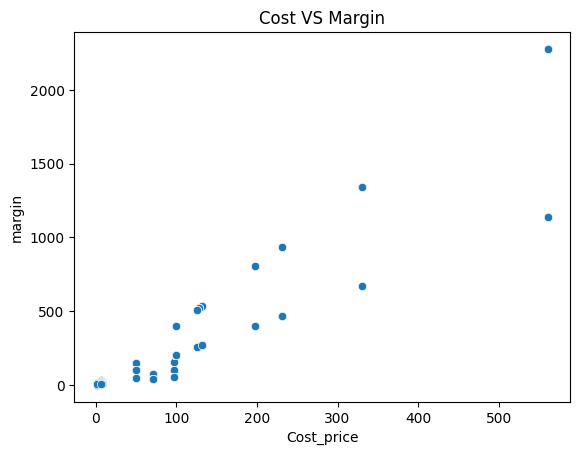

In [25]:
sns.scatterplot(x='Cost_price',y='margin',data=df)    # here we search for a relation between the cost and the margin
plt.title('Cost VS Margin')
plt.show()

### now we need to ask some questions

In [26]:
df.head()

,Order_ID,Order_Date,Timing,Product,Category,Purchase_Address,City,Quantity_Ordered,Price_Each,Cost_price,margin,turnover
0,141234,2019-01-22,21:25,iPhone,Phones,"944 Walnut St, Boston, MA 02215",Boston,1,700.00,231.0000,469.0000,700.00
1,141235,2019-01-28,14:15,Lightning Charging Cable,Accessories,"185 Maple St, Portland, OR 97035",Portland,1,14.95,7.4750,7.4750,14.95
2,141236,2019-01-17,13:33,Wired Headphones,Accessories,"538 Adams St, San Francisco, CA 94016",San Francisco,2,11.99,5.9950,11.9900,23.98
3,141237,2019-01-05,20:33,27in FHD Monitor,Appliances,"738 10th St, Los Angeles, CA 90001",Los Angeles,1,149.99,97.4935,52.4965,149.99
4,141238,2019-01-25,11:59,Wired Headphones,Accessories,"387 10th St, Austin, TX 73301",Austin,1,11.99,5.9950,5.9950,11.99


#### what is the total Revenue for each purchase ?

In [27]:
purchase_sales=df.groupby('City')['turnover'].sum().sort_values(ascending=False).reset_index() 
purchase_sales         # here we prepared the data to visualize

,City,turnover
0,San Francisco,8254743.55
1,Los Angeles,5448304.28
2,New York City,4661867.14
3,Boston,3658627.65
4,Atlanta,2794199.07
5,Dallas,2765373.96
6,Seattle,2745046.02
7,Portland,2319331.94
8,Austin,1818044.33


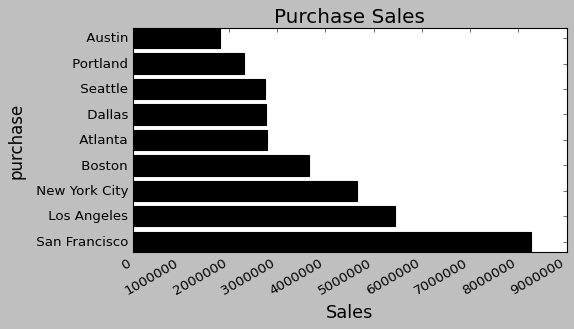

In [37]:
plt.style.use('grayscale')       # and here we visualize the answer to be more understandable
plt.figure(figsize=(7,4))
plt.barh(purchase_sales['City'],purchase_sales['turnover'])
plt.title('Purchase Sales',fontsize=18)
plt.xlabel('Sales',fontsize=16)
plt.ylabel('purchase',fontsize=15)
plt.gcf().autofmt_xdate()
plt.show()

##### *as we can see the largest revenue is from San Francisco purchase with 8 millions and more*

#### what is the most category orderd ?   note: don't forgeet the percantage

In [29]:
C_orderd=df['Category'].value_counts().reset_index()    # here as usual we prepared the data
C_orderd

,Category,count
0,Accessories,134376
1,Appliances,30101
2,Phones,12362
3,electronics,8847


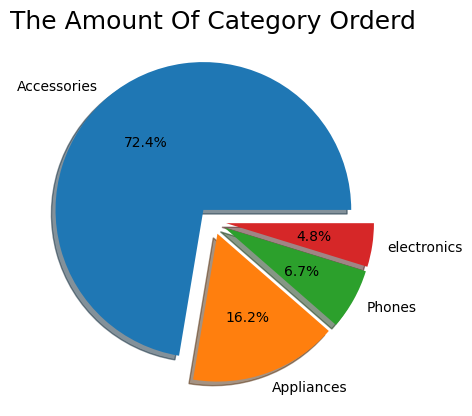

In [30]:
plt.style.use('default')       # and here we visualize the answer to be more understandable
slices=list(C_orderd['count'])
labels=list(C_orderd['Category'])
explode=[.1,.09,.09,.09]
plt.pie(slices,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('The Amount Of Category Orderd',fontsize=18)
plt.show()

##### *the most category ordered is Accessories with 72%*

#### can you show me a report with total sales in months ?

In [31]:
months=df['Order_Date'].dt.to_period('M')        # in this cell i split the date to months to get the revenue for each month
sales_month=df.groupby(months)['turnover'].sum()
sales_month=sales_month.reset_index()
sales_month=sales_month.set_index('Order_Date').iloc[0:-1,:]
sales_month

,turnover
Order_Date,
2019-01,1812742.87
2019-02,2200078.08
2019-03,2804973.35
2019-04,3389217.98
2019-05,3150616.23
2019-06,2576280.15
2019-07,2646461.32
2019-08,2241083.37
2019-09,2094465.69


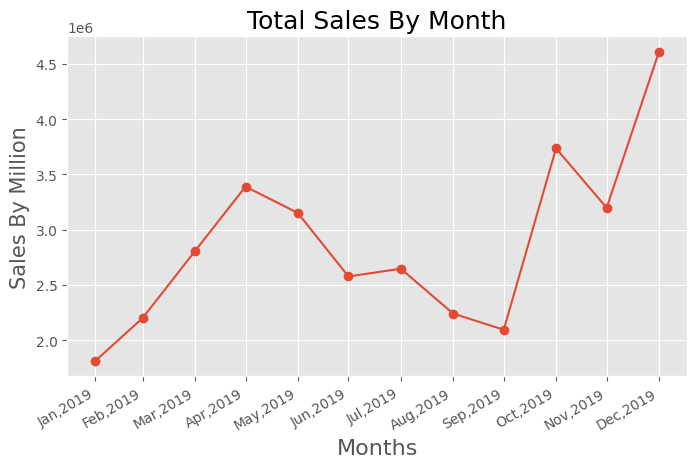

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 5))   
x_axis=sales_month.index
y_axis=sales_month['turnover']
plt.plot_date(x_axis,y_axis,linestyle='solid')
ticks=list(x_axis)
plt.xticks(ticks)
date_format=mpl_dates.DateFormatter('%b,%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()
plt.title('Total Sales By Month',fontsize=18)
plt.xlabel('Months',fontsize=16)
plt.ylabel('Sales By Million',fontsize=15)
plt.show()

##### *there is a growth in sales in the first and the last quarter of the year*

#### when is the rush hour & light hour?

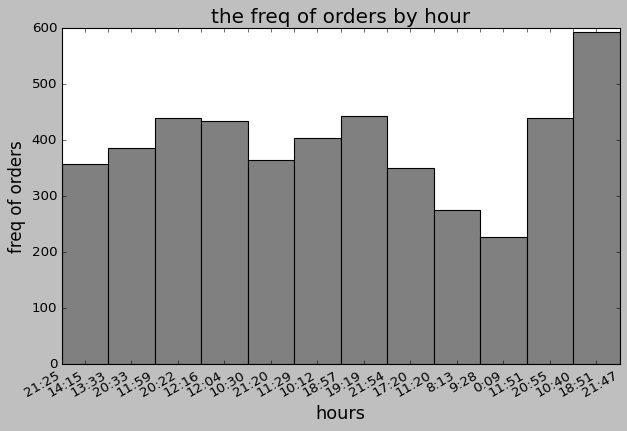

In [33]:
plt.style.use('classic')
plt.figure(figsize=(9, 6))  
plt.hist(df['Timing'],bins=12,range=[0,24], facecolor='gray',edgecolor='black')
plt.gcf().autofmt_xdate()
plt.title('the freq of orders by hour',fontsize=18)
plt.xlabel('hours',fontsize=16)
plt.ylabel('freq of orders',fontsize=15)
plt.show()

##### now we can determine the rush hour and the light hour

#### THE REPORT:

##### i think we have to make offers on the high_cost products like electroncis and phones because they had a low ratio in orders but they have a high margin 
##### and we can make offers on the preiod from 22:00 to 12:00 to increase sales in this preiod 
##### and finally as we noticed there is a problem in sales ratio in the second and third quarter of the year